<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/stats_523891-svm-dual_coef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X[:, :2], y, test_size=0.2, random_state=42)


In [2]:
svm = SVC(C=10, kernel='linear', gamma='scale', decision_function_shape='ovo', max_iter=-1)
svm.fit(X_train, y_train)
print('Number of support vectors of each class:', svm.n_support_)


Number of support vectors of each class: [ 3 31 28]


In [3]:
np.hstack(([0], svm.n_support_[:-1]))


array([ 0,  3, 31])

In [4]:
sv_per_class = np.split(svm.support_vectors_, np.cumsum(svm.n_support_)[:-1])
dc_per_class = np.split(svm.dual_coef_.T, np.cumsum(svm.n_support_)[:-1])
for i, (sv_in_class, dc_in_class) in enumerate(zip(sv_per_class, dc_per_class)):
    print(f"Class {i}")
    print("support vectors:      dual coefs")
    for sv, dc in zip(sv_in_class, dc_in_class):
        print(f"[{sv[0]:1.1f}, {sv[1]:1.1f}]        {dc[0]:>5.1f}, {dc[1]:>5.1f}")
    print('')


Class 0
support vectors:      dual coefs
[5.0, 3.0]          2.3,   0.0
[4.5, 2.3]         10.0,   8.0
[5.4, 3.4]         10.0,   5.6

Class 1
support vectors:      dual coefs
[6.7, 3.1]         -0.0,  10.0
[6.4, 3.2]         -0.0,  10.0
[6.0, 3.4]         -0.0,  10.0
[6.7, 3.1]         -0.0,  10.0
[6.6, 3.0]         -0.0,  10.0
[5.7, 2.9]         -0.0,  10.0
[5.6, 3.0]         -0.0,   9.4
[5.8, 2.7]         -0.0,  10.0
[5.7, 3.0]         -0.0,  10.0
[6.2, 2.9]         -0.0,  10.0
[6.0, 2.2]         -0.0,   9.2
[5.4, 3.0]        -10.0,   0.0
[6.7, 3.0]         -0.0,  10.0
[5.9, 3.2]         -0.0,  10.0
[6.0, 2.7]         -0.0,  10.0
[6.3, 2.5]         -0.0,  10.0
[6.1, 2.9]         -0.0,  10.0
[6.5, 2.8]         -0.0,  10.0
[7.0, 3.2]         -0.0,  10.0
[5.9, 3.0]         -0.0,  10.0
[5.2, 2.7]         -2.3,   0.0
[6.1, 3.0]         -0.0,  10.0
[6.6, 2.9]         -0.0,  10.0
[5.6, 3.0]         -0.0,  10.0
[4.9, 2.4]        -10.0,   0.0
[6.9, 3.1]         -0.0,  10.0
[5.7, 2.8]        

In [5]:
svm.coef_

array([[-4.46152091,  3.69228137],
       [-2.89430677,  2.36750364],
       [-1.48119584, -0.74060078]])

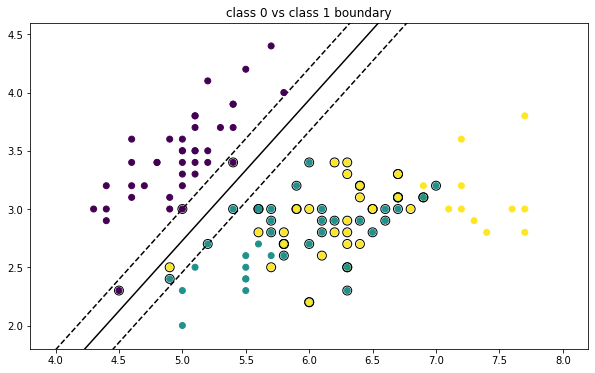

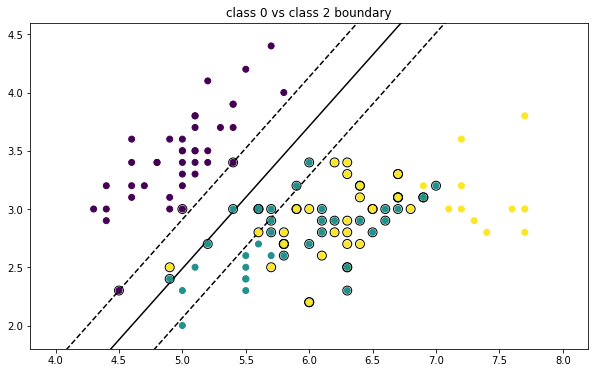

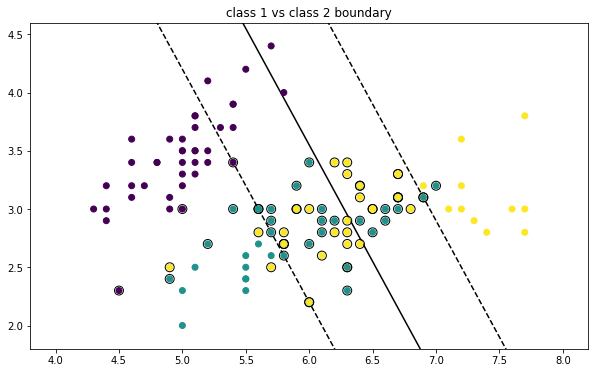

In [6]:
# Adapted from https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py
from matplotlib import pyplot as plt
from matplotlib import cm

clf = svm

for ovo_num in range(3):

    w = clf.coef_[ovo_num]
    a = -w[0] / w[1]
    xx = np.linspace(4, 8)
    yy = a * xx - (clf.intercept_[ovo_num]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    plt.figure(figsize=(10, 6))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k',
                cmap=cm.get_cmap('RdBu'))
    plt.scatter(X_train[:, 0], X_train[:, 1],
                c=y_train, zorder=10, cmap=cm.get_cmap('viridis'))
    plt.ylim([1.8, 4.6])
    plt.title(f"class {ovo_num // 2} vs class {ovo_num + 1 - int(ovo_num==2)} boundary")

    plt.show();